# Анализ и проверка гипотез по данным личного аккаунта сети Untappd

Данный проект изначально был предназначен для тренировки и отработки навыков работы с python, pandas, jupyter notebook и со всеми теми знаниями, что я получал в процессе учёбы. К тому же было достаточно интересно, даже с обыкновенной описательной точки зрения, получить сводку цифр, связанных с собой, и постараться найти причины их локальных состояний.

Впоследствии появилась идея о том, что и этот "блокнот" может войти в моё портфолио. К тому же я продолжаю им пользоваться, обновляя данные, поэтому решение привести его в надлежащий вид я нахожу правильным.

### 18+

Немного информации. Untappd - социальная сеть для биргиков. Биргики - слово, легко разбивающееся на два безо всяких специально написанных функций. С развитием пивного бизнеса, его брендированием под "ремесло", его упрощением, приобретением навыков низкоалкогольного напитка, доступного, трендового и чуть менее вредного для молодёжи, "тапок", как его ласково называют путешественники по барам, оказался как нельзя кстати. Он помогает: напиткам - продаваться, барам - развиваться, людям - коммуницировать, моде - быть самой собой. 

Минздрав, конечно, будет против, но этот прожект останется без критического взгляда.

Потому что для моего интереса к статистическим сводкам, начавшегося с увлечения спортом, "тапок" оказался элементом игры в чекины. Иначе говоря, "набиванием статы". 

Так приятно смотреть на таблички.

Untappd содержит карточки пива и пивоварен, а также имеет профайлы баров и пользователей. С помощью него можно обнаружить пиво, прочитать его характеристики или же узнать, где оно продаётся. Но самое главное - его можно оценить.
Внесение оценки состоит из привычных действий: комментарии, фотографии, отметка места, оценки, тегированный вкусовой профиль, друзья, которые пробовали очередной сорт вместе с тобой, лайки, именуемые тостами.
В общем, ничего сложного в функционировании приложения нет.

Зато сколько после него статистики! 

Основная статистика доступна в приложении. Всегда можно посмотреть сводную таблицу по стилям или странам, например. Можно платить за небольшую месячную подписку, с которой получать чуть больший функционал, в том числе и аккуратные временные графики. 

А можно и сделать запрос на всю-всю-всю сборку твоих действий. Он-то и будет нашим датасетом.

#### Задачи и направления

В данном прожекте основой будет описательная статистика, за которой я продолжаю наблюдать и которая может неким образом охарактеризовать меня. Это и можно назвать целью.

Также будут построены графики для наглядности и тренировки с их функционалом. Кроме того, в прожекте блок будет отдан на откуп попытки проверки статистических гипотез.

Получится или нет? Очень скоро узнаем.

А теперь к делу!

In [1]:
#import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from scipy import stats
%matplotlib inline

In [2]:
#open dataset

checkins = pd.read_csv('beer_march_first.csv')

## 1. Обзор датасета.

"Откроем" датасет, посмотрим на данные, которые в нём хранятся, посмотрим на его форму и выведем первые/последние записи.

In [3]:
checkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5664 entries, 0 to 5663
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   beer_name                     5664 non-null   object 
 1   brewery_name                  5664 non-null   object 
 2   beer_type                     5664 non-null   object 
 3   beer_abv                      5664 non-null   float64
 4   beer_ibu                      5664 non-null   int64  
 5   comment                       5556 non-null   object 
 6   venue_name                    5418 non-null   object 
 7   venue_city                    4913 non-null   object 
 8   venue_state                   5350 non-null   object 
 9   venue_country                 5418 non-null   object 
 10  venue_lat                     5418 non-null   float64
 11  venue_lng                     5418 non-null   float64
 12  rating_score                  5616 non-null   float64
 13  cre

In [4]:
#многовато сортов даже за семь лет

checkins.shape

(5664, 32)

In [5]:
checkins.head()

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,serving_type,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments
0,Hentai,AF Brew,IPA - American,5.9,50,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,Bottle,194363403,678907,38368,NaN,3.72,3.72,NaN,0,0
1,HopHead Double IPA,AF Brew,IPA - Imperial / Double,8.5,140,NaN,NaN,NaN,NaN,NaN,...,NaN,194363542,836456,38368,NaN,4.22,3.96,NaN,0,0
2,Chimay Grande Réserve (Blue),Bières de Chimay,Belgian Strong Dark Ale,9.0,35,NaN,NaN,NaN,NaN,NaN,...,NaN,194363634,34039,378,NaN,3.92,3.92,NaN,1,0
3,Chocolate Stout,Knightberg,Stout - Other,5.0,17,NaN,NaN,NaN,NaN,NaN,...,NaN,194363695,1105285,12920,NaN,3.77,3.76,NaN,0,0
4,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,Bottle,194363744,983516,82343,NaN,3.99,3.85,NaN,1,0


In [6]:
checkins.tail()

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,serving_type,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments
5659,Wild Graff,Salden's Brewery,Cider - Graff,6.5,0,"Называйте как хотите, тити, давайте говорить п...",Salden’s,Санкт-Петербург,Санкт-Петербург,Россия,...,Draft,1136841749,4486510,95242,https://untappd.s3.amazonaws.com/photos/2022_0...,3.85,3.72,NaN,5,0
5660,Hop Headshot: Simcoe,Midnight Project,IPA - Triple,11.0,111,"Все экстремисты, кто в тапке, отзовись!",Paragraph,Sankt-Peterburg,Санкт-Петербург,Россия,...,Draft,1136858960,3883890,329172,https://untappd.s3.amazonaws.com/photos/2022_0...,4.31,4.11,NaN,7,0
5661,KANPAI,Red Button Brewery,Koji / Ginjo Beer,7.0,0,"Больше вкусов, меньше хуйла!",Paragraph,Sankt-Peterburg,Санкт-Петербург,Россия,...,Can,1136863654,4737289,241689,https://untappd.s3.amazonaws.com/photos/2022_0...,3.86,3.73,NaN,5,0
5662,Paca-Vaca (パカ-ヴァカ),Cosmic City,Koji / Ginjo Beer,12.0,0,Тогда что такое напиток от батонов и что кто в...,Spontan,СПБ,Санкт-Петербург,Россия,...,Draft,1136893234,4735121,89993,https://untappd.s3.amazonaws.com/photos/2022_0...,3.92,3.74,NaN,7,1
5663,Señor Cybies Cherries And Berries,Crooked Stave Artisan Beer Project,Sour - Fruited,8.4,45,"Вот это можно подвести под параграф ""заебись""",Spontan,СПБ,Санкт-Петербург,Россия,...,Draft,1136933801,3792931,10568,https://untappd.s3.amazonaws.com/photos/2022_0...,4.02,3.97,NaN,9,0


## 2. Форматирование некоторых данных, которое потребуется в работе

В этом разделе "складируются" некоторые фазы клининга, которые требуются для работы. В частности:

- форматируется время;
- удаляются дубликаты (неуникальное пиво и случайные повторы в таблице);
- удаляются строки с отсуствующей выставленной оценкой;
- переименовываются длинные названия в чекинах.

In [7]:
#перевод столбца в тип datetime

checkins['created_at'] = pd.to_datetime(checkins['created_at'])

In [8]:
#определение дней недели

checkins['weekdays'] = checkins['created_at'].dt.dayofweek
checkins['weekdays'].value_counts()

4    1278
5     953
3     759
2     709
0     708
1     633
6     624
Name: weekdays, dtype: int64

In [9]:
#переименование длинных наименований

checkins = checkins.replace({'Остановка «Светлановский просп. / просп. Тореза»':'Ост. «Светлановский/Тореза»'})

In [10]:
#удаление дублированных чекинов (сорта, которые я пробовал несколько раз)
che = checkins.copy()
che[che.duplicated(subset = ['beer_name', 'brewery_name', 'beer_abv'])]

che[che['beer_name'] == 'Urizen']

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments,weekdays
4,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,194363744,983516,82343,NaN,3.99,3.85,NaN,1,0,4
72,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,Разлив в марте пятняшки. Теперь полностью из х...,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,264434131,983516,82343,https://untappd.s3.amazonaws.com/photo/2016_01...,3.99,3.85,NaN,1,0,3
2672,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,Бутылка от марта 2015. На этот раз от хрена ни...,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,829473732,983516,82343,NaN,3.99,3.85,NaN,12,0,4


In [11]:
checkins_drop = che.drop_duplicates(subset = ['beer_name', 'brewery_name', 'beer_abv'])
checkins_drop[checkins_drop['beer_name'] == 'Urizen']

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments,weekdays
4,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,194363744,983516,82343,NaN,3.99,3.85,NaN,1,0,4


In [12]:
#копия датасета с удалёнными строками, в которых отсутствовала оценка

checkins_drop_notnan = checkins_drop.copy()
checkins_drop_notnan = checkins_drop_notnan.dropna(subset = ['rating_score'])

## 3. Описательная статистика

Раздел, ради которого всё затевалось. В нём будут синтезированы некоторые интересующие меня показатели, которые раскрывают палитру интересов к пивному напитку.

Будут описаны следующие показетели (колонки датасета):

- **rating_score** - персональные оценки
- **global_weighted_rating_score** - взвешенные средние оценки пользователей для попробованного сорта
- **beer_type** - стили пива
- **brewery_name** - наименование пивоварни
- **brewery_country** - страна, которой пивоварня принадлежит
- **total_toasts** - количество лайков за чекин пива
- **venue_name** - название места, где пиво было попробовано
- **tagged_friends** - люди, которые пробовали сорт вместе со мной
- **comments** - персональный текст, которым был описан сорт

#### #Ключевые показатели распределения оценок

In [13]:
#ключевые показатели персональных оценок 

checkins['rating_score'].describe()

count    5616.000000
mean        3.638364
std         0.422680
min         0.500000
25%         3.500000
50%         3.750000
75%         3.900000
max         5.000000
Name: rating_score, dtype: float64

In [14]:
#ключевые показатели взвешенных средних оценок пользователей

checkins['global_weighted_rating_score'].describe()

count    5664.000000
mean        3.708821
std         0.287303
min         0.840000
25%         3.600000
50%         3.750000
75%         3.880000
max         4.570000
Name: global_weighted_rating_score, dtype: float64

#### #Гайд по стилям пива

Для меня основным статистическим и дегустационным параметром являются стили пива. Безусловно, стиль - глава "большого крафтового города", ответственный за разнообразие. В этот же момент, разнообразие - глава "большого крафтового государства", ответственный за интерес к потреблению. 

Отсутствие разницы между стилями убило бы весь интерес. А так как пивной продукт, как и всё в жизни, подвержен эволюции, то убийства не происходит. 

In [15]:
#стили пива, их распределение по количеству и средним персональным/взвешенным средним общим оценкам (не менее 10 чекинов на стиль)

checkins['beer_type'].value_counts()

Sour - Other Gose                   316
IPA - American                      297
Sour - Fruited                      227
IPA - New England / Hazy            223
Sour - Fruited Gose                 194
                                   ... 
Mild - Dark                           1
Farmhouse Ale - Bière de Coupage      1
Mumme                                 1
Farmhouse Ale - Bière de Mars         1
Kentucky Common                       1
Name: beer_type, Length: 224, dtype: int64

In [16]:
#стили пива, в которых у меня попробовано менее 10 сортов

checkins_drop['beer_type'].value_counts()[checkins_drop['beer_type'].value_counts() < 10]

IPA - Rye                        9
Gruit / Ancient Herbed Ale       9
Brown Ale - American             9
IPA - New Zealand                9
Wheat Beer - Wheat Wine          9
                                ..
Root Beer                        1
Kentucky Common                  1
Farmhouse Ale - Bière de Mars    1
Mumme                            1
Mild - Dark                      1
Name: beer_type, Length: 79, dtype: int64

In [17]:
#лучшие стили пива по моей оценке (попробовано не менее 10 сортов)

avg_beer_type = checkins_drop.groupby('beer_type')['rating_score']
avg_beer_type.mean()[(avg_beer_type.size() >= 10)].sort_values(axis=0, ascending=False)

beer_type
Lambic - Gueuze                     4.084091
Freeze-Distilled Beer               4.075000
Stout - Imperial / Double Coffee    4.028571
Lambic - Fruit                      3.983333
Chilli / Chile Beer                 3.923913
                                      ...   
Lager - Amber                       3.018182
Non-Alcoholic Beer                  2.935294
Red Ale - Irish                     2.905556
Lager - Strong                      2.904545
Lager - Pale                        2.891346
Name: rating_score, Length: 145, dtype: float64

In [18]:
#лучшие стили пива, присутвующие в датасете, по средне взвешанной мировой оценке (попробовано не менее 10 сортов)

global_avg_beer_type = checkins_drop.groupby('beer_type')['global_weighted_rating_score']
global_avg_beer_type.mean()[(global_avg_beer_type.size() >= 10)].sort_values(axis=0, ascending=False)

beer_type
Stout - Imperial / Double Coffee    4.140000
Stout - Imperial / Double Pastry    4.018103
Lambic - Framboise                  4.017273
IPA - Triple New England / Hazy     3.995833
Sour - Smoothie / Pastry            3.994026
                                      ...   
Kellerbier / Zwickelbier            3.207500
Lager - Pale                        3.155769
Lager - American                    3.118571
Lager - Strong                      3.003636
Non-Alcoholic Beer                  2.959143
Name: global_weighted_rating_score, Length: 145, dtype: float64

#### #Гайд по странам

Как мы узнавали географию по футболу и иным видам спорта, так сейчас в сознании созданы слоты для географии пивной. В настоящем подразделе, аналогично предыдущему, содержатся наиболее часто зачекиненные государства-производители со средней оценкой.

In [71]:
#страны, чьё производство я пробовал

checkins_drop['brewery_country'].value_counts().head(20)

Russia            3188
United States      363
Belgium            283
Germany            235
England            156
Netherlands        128
Estonia            105
Denmark             95
Scotland            94
Spain               94
Sweden              89
Norway              81
Belarus             70
Italy               60
Czech Republic      52
Finland             45
Lithuania           37
Latvia              35
Moldova             30
Poland              27
Name: brewery_country, dtype: int64

In [20]:
checkins['brewery_country'].unique()

array(['Russia', 'Belgium', 'Scotland', 'Netherlands', 'United States',
       'Norway', 'Poland', 'Latvia', 'Denmark', 'Spain', 'Estonia',
       'Italy', 'England', 'Finland', 'Germany', 'Moldova', 'Serbia',
       'Japan', 'Sweden', 'Ireland', 'Wales', 'Armenia', 'Belarus',
       'Czech Republic', 'Georgia', 'Mexico', 'Aland Islands', 'France',
       'Iceland', 'Austria', 'Singapore', 'Lithuania', 'Ukraine',
       'Azerbaijan', 'Turkey', 'Hungary', 'Canada', 'Argentina',
       'Costa Rica', 'Greece', 'Switzerland', 'Romania', 'Portugal',
       "China / People's Republic of China", 'New Zealand', 'South Korea',
       'Philippines', 'Thailand', 'Australia', 'Jamaica', 'Vietnam',
       'Indonesia', 'Kazakhstan', 'Northern Ireland', 'Bahamas',
       'Kyrgyzstan', 'Slovakia', 'Israel'], dtype=object)

In [21]:
#лучшие государства-производители пива по моей оценке (попробовано не менее 20 сортов)

avg_country_score = checkins_drop.groupby('brewery_country')['rating_score']
avg_country_score.mean()[(avg_country_score.size() >= 20)].sort_values(axis=0, ascending=False)

brewery_country
Norway            3.810625
United States     3.797917
Belgium           3.772872
Sweden            3.753933
Italy             3.736441
Denmark           3.728261
Netherlands       3.669291
Spain             3.650000
Russia            3.647031
Scotland          3.646739
Belarus           3.637143
Estonia           3.630198
France            3.575000
England           3.537419
Finland           3.504444
Germany           3.378326
Ireland           3.338636
Poland            3.318000
Czech Republic    3.293269
Moldova           3.271667
Lithuania         3.158108
Latvia            3.137143
Name: rating_score, dtype: float64

In [22]:
#лучшие государства-производители пива из присутствующих в датасете, по средней взвешенной мировой оценке (попробовано не менее 20 сортов)

avg_country_global_score = checkins_drop.groupby('brewery_country')['global_weighted_rating_score']
avg_country_global_score.mean()[(avg_country_global_score.size() >= 20)].sort_values(axis=0, ascending=False)

brewery_country
Belarus           3.811571
United States     3.807631
Russia            3.776289
Norway            3.755309
Sweden            3.734157
Spain             3.689574
Belgium           3.683746
Italy             3.653667
Denmark           3.650526
France            3.631923
Netherlands       3.616172
Scotland          3.607447
Estonia           3.598000
Moldova           3.589333
England           3.584038
Ireland           3.557917
Poland            3.395926
Germany           3.393404
Czech Republic    3.364808
Finland           3.322889
Latvia            3.308000
Lithuania         3.228919
Name: global_weighted_rating_score, dtype: float64

In [23]:
#соединим таблицы в один датасет

countries_mine = avg_country_score.mean()[(avg_country_score.size() >= 20)]
countries_global = avg_country_global_score.mean()[(avg_country_global_score.size() >= 20)]
avg_countries_scores = pd.merge(left=countries_mine, right=countries_global, on='brewery_country')

In [24]:
# найдём разницу между выставляемыми мной оценками и между оценками, которые ставят в целом

avg_countries_scores['difference'] = avg_countries_scores.rating_score - avg_countries_scores.global_weighted_rating_score
avg_countries_scores.head()

,rating_score,global_weighted_rating_score,difference
brewery_country,,,
Belarus,3.637143,3.811571,-0.174429
Belgium,3.772872,3.683746,0.089127
Czech Republic,3.293269,3.364808,-0.071538
Denmark,3.728261,3.650526,0.077735
England,3.537419,3.584038,-0.046619


In [25]:
#отсортируем и посмотрим за восхвалением и предвзятостью

avg_countries_scores.difference.sort_values(ascending=False)

brewery_country
Finland           0.181556
Belgium           0.089127
Italy             0.082774
Denmark           0.077735
Norway            0.055316
Netherlands       0.053119
Scotland          0.039292
Estonia           0.032198
Sweden            0.019775
United States    -0.009714
Germany          -0.015078
Spain            -0.039574
England          -0.046619
France           -0.056923
Lithuania        -0.070811
Czech Republic   -0.071538
Poland           -0.077926
Russia           -0.129258
Latvia           -0.170857
Belarus          -0.174429
Ireland          -0.219280
Moldova          -0.317667
Name: difference, dtype: float64

Я считаю лучшими ***Норвегию, Соединённые Штаты и Бельгию*** по части варки пива. По тем же сортам мировой консенсус сходится на ***США, Белоруссии и России***. К сожалению, мой профиль, как выборка, слишком географически субъективен.

Что же касается выставления оценок, то куда лучшие котировки для меня имеют ***Финские*** производители. Суровее всего, по сравнению с остальными, я отношусь к ***Латвии, Белоруссии, Ирландии и Молдове***.

#### #Гайд по пивоварням

Конечно же нельзя обойти стороной и пивоварни - напрямую ответственные за результат и за восприятие. Углубляться не будем, посмотрим только количество потреблённых сортов и средние оценки. 

Используем дасасет только с уникальными чекинами.

In [26]:
#пивоварни, чьё производство я пробовал

checkins_drop['brewery_name'].value_counts().head(15)

AF Brew                190
Salden's Brewery       181
Big Village Brewery    151
Zagovor Brewery        151
Bakunin Brewing Co.    150
Stamm Brewing          102
Red Button Brewery      78
DIETA / ДИЕТА           76
Wild Lab                68
Hophead Brewery         64
BrewDog                 63
Jaws Brewery            61
Selfmade Brewery        59
OSTROVICA               59
4BREWERS                55
Name: brewery_name, dtype: int64

In [27]:
#лучшие пивоварни по моим оценкам (зачекинено не менее 25 сортов)

avg_brewery_score = checkins_drop_notnan.groupby('brewery_name')['rating_score']
avg_brewery_score.mean()[(avg_brewery_score.size() >= 25)].sort_values(axis=0, ascending=False).head(15)

brewery_name
Brouwerij Alvinne       4.001923
Evil Twin Brewing       3.942593
DIETA / ДИЕТА           3.933553
Brouwerij Kees          3.912000
Midnight Project        3.873214
Plague Brew             3.856977
Stamm Brewing           3.824510
Founders Brewing Co.    3.821875
Big Village Brewery     3.802318
To Øl                   3.801724
Wild Lab                3.792647
Zagovor Brewery         3.786755
Brewlok Brewery         3.784000
Brouwerij de Molen      3.782927
Red Rocket Brewery      3.778571
Name: rating_score, dtype: float64

In [28]:
#лучшие пивоварни по средне взвешенным оценкам (зачекинено не менее 25 сортов)

avg_brewery_global_score = checkins_drop_notnan.groupby('brewery_name')['global_weighted_rating_score']
avg_brewery_global_score.mean()[(avg_brewery_score.size() >= 25)].sort_values(axis=0, ascending=False).head(15)

brewery_name
Midnight Project        4.018929
Founders Brewing Co.    3.977188
Zagovor Brewery         3.970000
DIETA / ДИЕТА           3.969605
Stamm Brewing           3.956176
Wild Lab                3.906618
Big Village Brewery     3.894834
Brewlok Brewery         3.894800
Brouwerij Alvinne       3.888462
Selfmade Brewery        3.881864
AF Brew                 3.865450
Red Rocket Brewery      3.860714
4BREWERS                3.860364
Rewort Brewery          3.857000
Hophead Brewery         3.851719
Name: global_weighted_rating_score, dtype: float64

Кроме непосредственной оценки продукта пивоварни, можно посмотреть, насколько эти пивоварни оцениваются тостами моих друзей. Для этого потренируем ***pivot_table*** и ***merge***.

In [29]:
#получаем сводные таблицы по пивоварням в сочетании с количеством тостов и количеством попровобованных сортов

brewery_toasts_pivot1 = checkins.pivot_table(aggfunc='sum', index='brewery_name', values='total_toasts', margins=True)
brewery_toasts_pivot2 = checkins.pivot_table(aggfunc='count', index='brewery_name', values='beer_abv', margins=True)
brewery_toasts = brewery_toasts_pivot1.merge(brewery_toasts_pivot2, on='brewery_name', how='inner')
brewery_toasts.rename(columns={'beer_abv':'counts'}, inplace=True)
brewery_toasts

,total_toasts,counts
brewery_name,,
Pub 102,8,1
"0,5 Pub",8,1
084Brewery,42,3
12 Acres Brewing Company,15,1
13 Litar,12,1
...,...,...
Хадыженский Пивзавод,14,1
Царскосельская Сидрерия,18,1
Частная Пивоварня Дорошенко,33,4


In [30]:
#вычисляем среднее количество тостов на пивоварню

brewery_toasts['toast_per_brewery'] = brewery_toasts.total_toasts/brewery_toasts.counts
brewery_toasts[brewery_toasts['counts'] > 10].toast_per_brewery.sort_values(ascending=False).head(10)

brewery_name
Cosmic City                 16.941176
Rising Moon Brewery         16.565217
Privatbrauerei Eichbaum     16.300000
Brew Fiction                16.000000
Courage Brewery             15.500000
BrewT!                      15.333333
Пивная Диета (Beer Diet)    15.285714
DIETA / ДИЕТА               15.210526
Hophead Brewery             15.141026
COVEN BREWERY               14.933333
Name: toast_per_brewery, dtype: float64

***Cosmic City*** в этом плане определённо на самой пиковой точке.

 #### #Немного о лагерах и пилзнерах

Для интереса приведём ещё некоторую описательную статистику, которая могла бы порадовать любого биргика. Затронем лагера, пилзнеры и пшеничку, как элемент "чистоты" среди многочисленных экспериментов.

Определим страны и пивоварни, кто лучше всех может почувствовать "классику". Опять же, всё на взгляд автора.

In [31]:
#распределение оценок для "классики"
lag_pils = checkins_drop[checkins_drop['beer_type'].str.contains('Lager|Pilsner|Hefeweizen')]
lag_pils['rating_score'].value_counts(bins=8, normalize=True)*100

(3.188, 3.625]    34.583333
(2.75, 3.188]     24.166667
(3.625, 4.062]    17.500000
(2.312, 2.75]     13.333333
(1.875, 2.312]     6.041667
(4.062, 4.5]       2.291667
(1.438, 1.875]     0.833333
(0.995, 1.438]     0.625000
Name: rating_score, dtype: float64

In [32]:
#лучшие пивоварни, способные варить "классику" (не менее 4 чекинов на пивоварню)

brewery_lager_score = lag_pils.groupby('brewery_name')['rating_score']
brewery_lager_score.mean(True)[(brewery_lager_score.size() >= 4)].sort_values(axis=0, ascending=False)

brewery_name
Пивоварня Одна тонна / Odna Tonna Brewery                    4.070000
Пивная Диета (Beer Diet)                                     3.940000
Velka Morava                                                 3.804545
Stamm Brewing                                                3.692857
AF Brew                                                      3.675000
Ayinger Privatbrauerei                                       3.600000
Salden's Brewery                                             3.585714
OSTROVICA                                                    3.575000
Jaws Brewery                                                 3.490000
Kulmbacher Brauerei                                          3.260000
Tradiční pivovar v Rakovníku                                 3.187500
Buket Chuvashii (Букет Чувашии)                              3.183333
Spaten-Franziskaner-Löwenbräu-Gruppe                         3.150000
Privatbrauerei Eichbaum                                      3.033333
Moscow 

In [33]:
#лучшие страны, чьи пивоварни способны варить "классику" (не менее 10 чекинов на пивоварню)

country_lager_score = lag_pils.groupby('brewery_country')['rating_score']
country_lager_score.mean()[(country_lager_score.size() >= 10)].sort_values(axis=0, ascending=False)

brewery_country
United States     3.460000
Russia            3.305966
Germany           3.220408
Czech Republic    3.146296
Netherlands       3.122727
Moldova           3.107692
Lithuania         3.046429
Latvia            2.833333
Name: rating_score, dtype: float64

#### #Немного об айпиэях

Думаю, что интерес к IPA также классичен.

In [34]:
ipa = checkins_drop[checkins_drop['beer_type'].str.contains('IPA')]
ipa['rating_score'].value_counts(bins=8, normalize=True)*100

(3.375, 3.75]                  55.512119
(3.75, 4.125]                  26.739640
(3.0, 3.375]                    8.287725
(4.125, 4.5]                    4.143862
(2.625, 3.0]                    3.596560
(2.25, 2.625]                   0.390930
(1.4960000000000002, 1.875]     0.234558
(1.875, 2.25]                   0.078186
Name: rating_score, dtype: float64

In [35]:
#лучшие пивоварни, способные варить "хмелевую классику" (не менее 15 чекинов на пивоварню)

brewery_ipa_score = ipa.groupby('brewery_name')['rating_score']
brewery_ipa_score.mean(True)[(brewery_ipa_score.size() >= 4)].sort_values(axis=0, ascending=False).head(10)

brewery_name
Rogue Ales                  3.930000
Õllenaut                    3.916667
Midnight Project            3.900000
Пивная Диета (Beer Diet)    3.887500
Ægir Bryggeri               3.875000
Adroit Theory               3.866667
Aslin Beer Company          3.850000
Stamm Brewing               3.842105
DIETA / ДИЕТА               3.840909
Garage Beer Co.             3.833333
Name: rating_score, dtype: float64

In [36]:
#лучшие страны, чьи пивоварни способны варить "хмелевую классику" (не менее 15 чекинов на пивоварню)

country_ipa_score = ipa.groupby('brewery_country')['rating_score']
country_ipa_score.mean()[(country_ipa_score.size() >= 10)].sort_values(axis=0, ascending=False)

brewery_country
United States    3.749573
Norway           3.745833
Denmark          3.733333
Belarus          3.728571
Estonia          3.704348
Spain            3.703704
Scotland         3.703448
Sweden           3.693333
Russia           3.666919
Netherlands      3.643750
Germany          3.638235
England          3.617308
Italy            3.490909
Name: rating_score, dtype: float64

Жаль, что живя в России, имеешь доступ к массмаркету, а твои чекины зависят от способностей ведения бизнеса поставщиков и государственного устройства.

#### #Пройдёмся по заведениям

Безусловно, интерес могут представлять и заведения. Конечно, статистика оценок в заведении не может являться фактором, определяющим решение о посещении. Тем не менее, в некоторых из них оценки выставляются лучше. 

Оговоримся, что описательная статистика не выявляет причины. И можно лишь догадываться, был ли бармен настолько хорош, что мне понравилось всё, что мы с ним попробовали. 

Посмотрим на средние персональные, средние взвешенные общие, а также дополнительно выясним, в каком баре я оставляю самые длинные комментарии в чекинах. Здесь причина более очевидна - при бармене и друзьях написать длинный комментарий невозможно.

In [37]:
#средние персональные оценки пиву в заведениях (не менее 20 чекинов в заведении)

avg_venue_score = checkins_drop.groupby('venue_name')['rating_score']
avg_venue_score.mean()[(avg_venue_score.size() >= 20)].sort_values(axis=0, ascending=False).head(25)

venue_name
AF Brew Taproom                    3.893333
Avrora Bar                         3.881818
TOP HOPS                           3.845946
Beer Diet (Пивная Диета)           3.815625
Лободэй 2021                       3.813846
Old Skull Fest                     3.808696
Redrum Bar                         3.793600
RULE taproom                       3.791892
Share House                        3.789344
Beergeek Craft Beer Bar & Store    3.788757
Баланс белого                      3.787097
Spontan                            3.784656
Paragraph                          3.772000
Усы на пене                        3.757143
Fillin'Good                        3.756939
St.Petersburg Craft Event          3.756566
Big Craft Day 2019 у моря          3.747849
Breaking Bad Beer Cafe             3.728261
Бирвария                           3.726923
Jawsspot                           3.723510
Bottle Expert                      3.716071
Beer Addicts                       3.714815
Ward № 6 (Палата № 6)

In [38]:
#средние взвешенные общие оценки пиву в заведениях (не менее 20 чекинов в заведении)

avg_venue_score = checkins_drop.groupby('venue_name')['global_weighted_rating_score']
avg_venue_score.mean()[(avg_venue_score.size() >= 20)].sort_values(axis=0, ascending=False).head(25)

venue_name
Avrora Bar                         3.946364
AF Brew Taproom                    3.928444
Beer Diet (Пивная Диета)           3.873616
TOP HOPS                           3.870946
Big Craft Day 2019 у моря          3.860000
Лободэй 2021                       3.859692
Paragraph                          3.856154
Beer Addicts                       3.842561
Spontan                            3.837467
Viderzhka                          3.815769
Redrum Bar                         3.814480
Share House                        3.808852
RULE taproom                       3.807297
Fillin'Good                        3.801870
Beergeek Craft Beer Bar & Store    3.800702
Jawsspot                           3.794437
St.Petersburg Craft Event          3.788137
Bottle Expert                      3.781786
Breaking Bad Beer Cafe             3.775217
Craft Republic                     3.760588
KIOSK                              3.760110
Баланс белого                      3.738404
Craft Beer Shop      

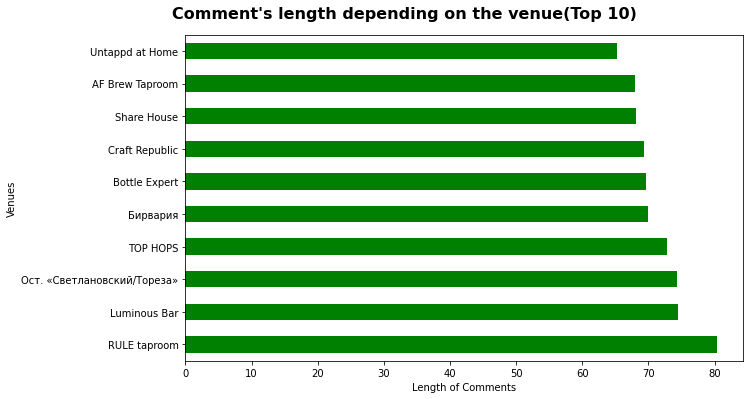

In [39]:
#места, в которых пишу самые длинные комментарии (учитываются все чекины; количество чекинов на бар больше 15)

checkins['comment_lenght'] = checkins['comment'].str.len()

avg_venue_ch_len = checkins.groupby('venue_name')['comment_lenght']
comment_hist = avg_venue_ch_len.mean()[(avg_venue_ch_len.size() >= 15)].sort_values(axis=0, ascending=False).head(10)

comment_hist.plot(kind = 'barh', figsize=[10,6], color = 'green')
plt.xlabel('Length of Comments')
plt.ylabel('Venues')
plt.text(x = -2, y= 10, s="Comment's length depending on the venue(Top 10)", size = 16, weight='bold')
plt.show()

#### #Сколько мне ещё хочется зачекинить

Этот счётчик добавлен вне системы. При помощи него я вижу, сколько чекинов ещё хотел бы сделать.

Последним и главным интересом для меня обладает желание попробовать не менее десяти сортов для каждого стиля. Желание граничит на границе искусственного и знакового. С одной стороны, это просто вымысел, последняя привязка для того, чтобы закончить с хобби "набивания статистики на вредных привычках", с другой - возможность увереннее себя чувствовать в спорах, обладая "знанием", ориентированным на кругозор. В общем-то, все интересы существуют только для того, чтобы кругозор был необъятен.

In [72]:
#сколько не хватает сортов для того, чтобы каждый стиль был попробован не менее 10 раз (quan = 1 отсутствующий стиль, умноженный на 10 проб)

style_dict = checkins_drop['beer_type'].value_counts().to_dict()
quan = 10

for each in style_dict:
    if style_dict[each] < 10:
        d = 10 - style_dict[each]
        quan += d

print('I need to check ' + str(quan) + ' beers')

I need to check 454 beers


#### #Гайд по временным промежуткам

Конечно же, как можно обойти стороной зависимость чекинов от времени! Эти закономерности - одни из самых востребованных в анализе любого процесса. 

Очень легко понять, где на графике пятница, а где отпуск. Если бы фестивали не проводились так часто и были бы строго по графику, заметили бы и их.

Вычислим самые активные года, месяца, дни, а также посмотрим, есть ли среди графиков зарождение параболы. В этом блоке учитываются все чекины, с учётом дублирующихся.

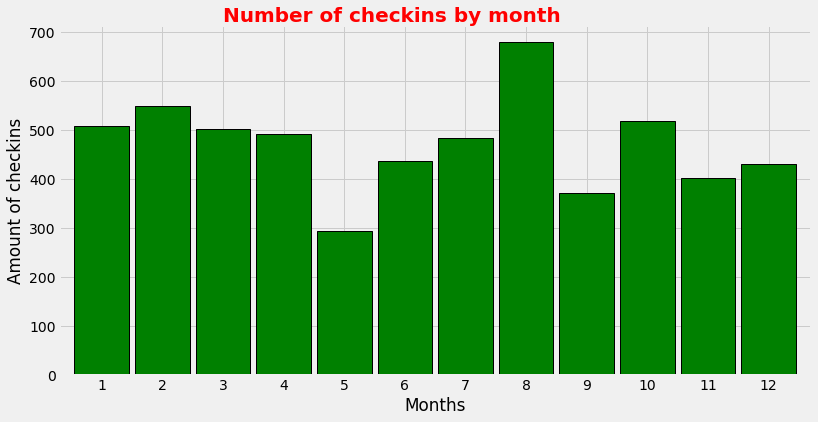

In [41]:
#количество чекинов за всё время, разбитое по месяцам

checkins['check_month'] = checkins['created_at'].dt.month
style.use('fivethirtyeight')
checkins['check_month'].value_counts().sort_index().plot(kind='bar', figsize=[12,6], width=0.9, color = 'green', edgecolor='black', linewidth=1)
plt.xlabel('Months')
plt.ylabel('Amount of cheсkins')
plt.xticks(rotation=360)
plt.text(x = 2, y= 720, s="Number of checkins by month", size = 20, weight='bold', color='red')
plt.show()

In [42]:
#количество чекинов, разбитое по годам
checkins['check_year'] = checkins['created_at'].dt.year
checkins['check_year'].value_counts()

2020    1470
2019    1397
2021    1155
2017     584
2018     457
2016     349
2022     186
2015      66
Name: check_year, dtype: int64

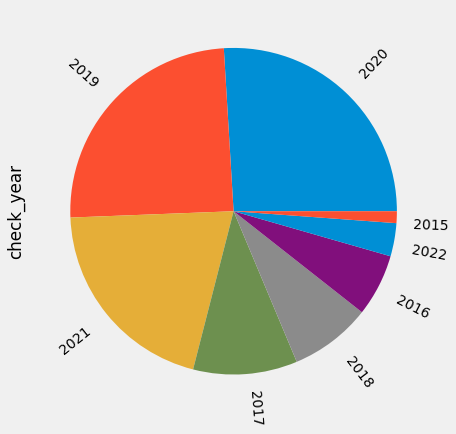

In [43]:
checkins['check_year'].value_counts().plot(kind='pie', figsize=[12,7], rotatelabels=True)

plt.show()

In [44]:
#распределение чекинов по месяцам за 2021 год

checkins[checkins['check_year'] == 2021]['check_month'].value_counts()

6     137
1     133
4     120
7     117
2     112
8     100
11    100
5      93
12     84
3      64
10     61
9      34
Name: check_month, dtype: int64

In [45]:
#распределение чекинов по дням за 2021 год

checkins[checkins['check_year'] == 2021]['weekdays'].value_counts()

4    356
5    241
6    118
0    117
2    109
1    107
3    107
Name: weekdays, dtype: int64

In [46]:
#распределение чекинов по дням за 2022 год

checkins[checkins['check_year'] == 2022]['weekdays'].value_counts()

4    77
0    26
1    24
5    22
2    20
3     9
6     8
Name: weekdays, dtype: int64

<AxesSubplot:xlabel='weekdays', ylabel='rating_score'>

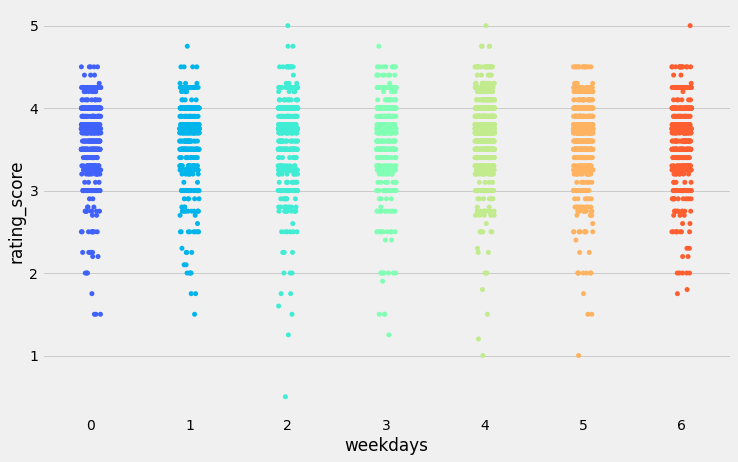

In [47]:
#оценки чекинов по дням за 2021 год

plt.figure(figsize=(11, 7)), 
sns.stripplot(x='weekdays', y='rating_score',data=checkins, palette='rainbow')

<AxesSubplot:xlabel='check_year', ylabel='serving_type'>

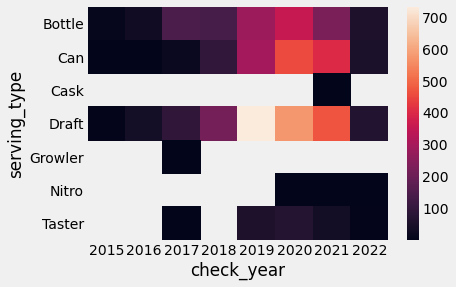

In [48]:
#тепловая карта для разных типов потребления

heatdata_serving = pd.pivot_table(checkins, values='beer_name', index='serving_type', columns='check_year', aggfunc='count')
sns.heatmap(heatdata_serving)

<AxesSubplot:xlabel='check_month', ylabel='check_year'>

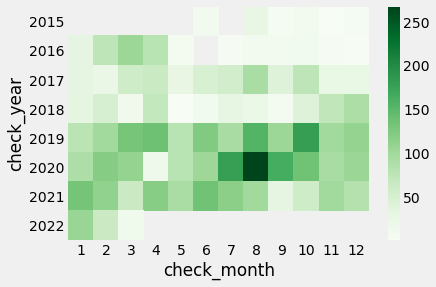

In [49]:
#тепловая карта для чекинов по годам и месяцам (отлично видны фестивали)

heatdata_serving = pd.pivot_table(checkins, values='beer_name', index='check_year', columns='check_month', aggfunc='count')
sns.heatmap(heatdata_serving, cmap='Greens')

In [50]:
#создаём сводную табличку количества чекинов по времени в зависимости от дня недели

checkins['check_hour'] = checkins['created_at'].dt.hour
ppop = pd.pivot_table(checkins, values='beer_name', index='weekdays', columns='check_hour', aggfunc='count')
ppop

check_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekdays,,,,,,,,,,,,,,,,,,,,,
0,11.0,2.0,1.0,NaN,1.0,NaN,1.0,4.0,21.0,1.0,...,16.0,38.0,61.0,115.0,142.0,86.0,71.0,42.0,42.0,14.0
1,10.0,7.0,6.0,2.0,6.0,1.0,NaN,9.0,4.0,6.0,...,4.0,19.0,56.0,84.0,108.0,89.0,75.0,67.0,42.0,23.0
2,23.0,11.0,1.0,11.0,5.0,NaN,NaN,4.0,4.0,13.0,...,11.0,24.0,56.0,88.0,103.0,98.0,63.0,51.0,59.0,41.0
3,19.0,2.0,2.0,5.0,NaN,NaN,NaN,5.0,10.0,8.0,...,25.0,46.0,55.0,100.0,132.0,113.0,71.0,48.0,43.0,45.0
4,22.0,4.0,NaN,1.0,1.0,NaN,1.0,18.0,11.0,3.0,...,19.0,53.0,152.0,181.0,156.0,165.0,169.0,137.0,86.0,71.0
5,58.0,27.0,18.0,2.0,1.0,NaN,1.0,5.0,2.0,29.0,...,49.0,69.0,78.0,100.0,81.0,72.0,83.0,61.0,71.0,45.0
6,35.0,29.0,10.0,10.0,10.0,NaN,NaN,3.0,21.0,35.0,...,30.0,27.0,34.0,47.0,54.0,49.0,45.0,30.0,23.0,18.0


In [51]:
# импортируем код со stackoverflow.com (нужно в нём когда-нибудь разобраться)

import matplotlib.cm as cm
import matplotlib as mpl

def pie_heatmap(table, cmap=cm.gnuplot, vmin=None, vmax=None,inner_r=0.25, pie_args={}):
    n, m = table.shape
    vmin= table.min().min() if vmin is None else vmin
    vmax= table.max().max() if vmax is None else vmax

    centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
    plt.gcf().gca().add_artist(centre_circle)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)
    for i, (row_name, row) in enumerate(table.iterrows()):
        labels = None if i > 0 else table.columns
        wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values], 
            labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)
        wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)

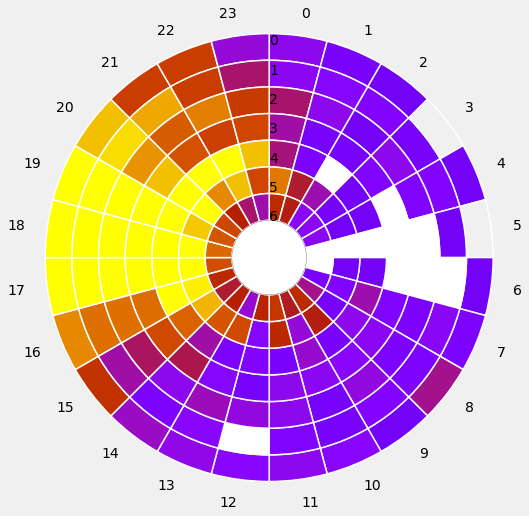

In [52]:
#строим тепловую карту в завимисости от времени потребления 

plt.figure(figsize=(8,8))
pie_heatmap(ppop, vmin=-20,vmax=80,inner_r=0.2)

plt.show()

In [53]:
#сколько дней требовалось на каждую тысячу чекинов

check = [0, 999, 1999, 2999, 3999, 4999]
days = []
for i in range(1,len(check)):
    x = check[i] - check[i-1]
    sum = checkins_drop.iloc[check[i]]['created_at'] - checkins_drop.iloc[check[i-1]]['created_at']
    sum = sum.days
    days.append(sum)

print(days)

[957, 510, 263, 241, 289]


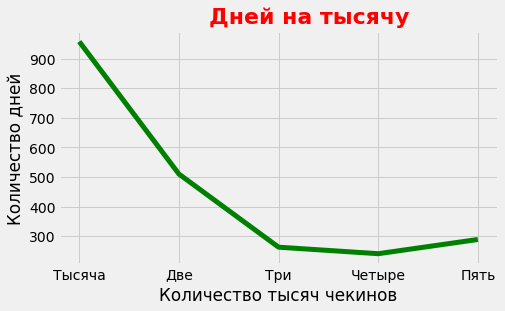

In [54]:
a = ["Тысяча", "Две", "Три", "Четыре", "Пять"]

plt.figure(figsize=[7,4])
plt.plot(a, days, color='green', linewidth = 5)
style.use('fivethirtyeight')
plt.xlabel("Количество тысяч чекинов")
plt.ylabel("Количество дней")
plt.text(x = 1.3, y= 1020, s="Дней на тысячу", size = 22, weight='bold', color='red')
plt.show()

Исходя из вышерасположенных графиков заметно, что за последние три года количество попробованных сортов выросло примерно в два раза. 
Пик пришёлся на ***2020 год***, в котором количество чекинов стремительно пересекло отметки в 3000 и 4000 тысячи, где был проведён фестивально-отпускной ***август*** с более чем 200 чекинами за месяц. 

Кроме того, ***август*** является самым активным месяцем по количеству чекинов. Причины всё те же - период отпусков, долгих прогулок по городу, встреч и фестивалей.

#### #Немного о социализации

Или о тех, без кого этой статистики бы не было. Друзья, с которыми чаще всего разделяются чекины. Люди, из-за которых зачастую их так много.

Найдём только один показатель - количество вместе попробованного пива.

In [55]:
#люди, с которыми я попробовал больше всего сортов

notnull = checkins.copy()['tagged_friends'].dropna()
notnull.value_counts(dropna=False)

Jesse Gray                                                        187
Petr M2FIVE                                                        94
Дядя Вася                                                          57
Jesse Gray,reijii Sakurai                                          52
Viktor Shrek                                                       35
                                                                 ... 
reijii Sakurai,Jesse Gray,White Dwarf                               1
Дядя Вася,Eugene Acid                                               1
July K,Andrey Andreev                                               1
Jesse Gray,July K,rOPbIHbI4,Alexander Kolchin,Nikita Zheleznov      1
Anna R,Jesse Gray                                                   1
Name: tagged_friends, Length: 186, dtype: int64

In [56]:
#оформляем всех друзей из чекинов в словарь, считаем количество уникальных значений

friends = notnull.apply(lambda x: x.split(',')).to_dict()
friends_count={}

for k,item in friends.items():
    for i in item:
        if i in friends_count:
            friends_count[i] += 1
        else:
            friends_count[i] = 1
print(friends_count)

{'Tatiana Karmanova': 4, 'Beer Addicts': 29, 'Darth Vader': 45, 'Eugene Acid': 61, 'Super Man': 5, 'SULYA': 46, 'July K': 95, 'Jesse Gray': 464, 'Дядя Вася': 73, 'Petr M2FIVE': 127, 'Aleksey Shitikov': 3, "Alexandr O'Lenin": 6, 'Мухтар': 2, 'Nof Nof': 2, 'Jeki Admiral  Foweq': 11, 'Anna R': 19, 'Dima Solntsev': 7, 'Nikita Zheleznov': 62, 'Violletta P': 70, 'Hans Jerkov': 10, 'Егор Ющенко': 55, 'Pavel Lebowski': 12, 'Daniil Korolkov': 2, 'Ksenia': 33, 'rOPbIHbI4': 27, 'Alexander Kolchin': 5, 'Golovin Pavel': 3, 'Erkki Ammalainen': 20, 'Вениамин Вкуснямба': 1, 'reijii Sakurai': 121, 'Andrey Andreev': 53, 'Viktor Shrek': 43, 'Roman K': 5, 'Marat Settarov': 3, 'Kirill Tychuk': 8, 'Evgeny Kataev': 35, 'Kirill Burgardt': 14, 'Daniel Pertsovsky': 4, 'White Dwarf': 13, 'Sergey Solovyev': 2, 'O Sh': 2, 'Tony White': 1, 'Max Dmitriev': 3, 'Niki Shmiki': 13, 'Jura Khil': 6, 'Любава Ефремова': 11, 'Kirill Polyak': 2, 'Aleksey Fadeenko': 1, 'Ivan Komarov': 3, 'Нина': 1, 'Karina Gorskova': 1, 'Vikto

In [57]:
#выбираем друзей, с которыми количество совместных чекинов превышает 50

friends_count_50 = {}

for k,i in friends_count.items():
    if i > 50:
        friends_count_50[k] = i
    
print(friends_count_50)

{'Eugene Acid': 61, 'July K': 95, 'Jesse Gray': 464, 'Дядя Вася': 73, 'Petr M2FIVE': 127, 'Nikita Zheleznov': 62, 'Violletta P': 70, 'Егор Ющенко': 55, 'reijii Sakurai': 121, 'Andrey Andreev': 53}


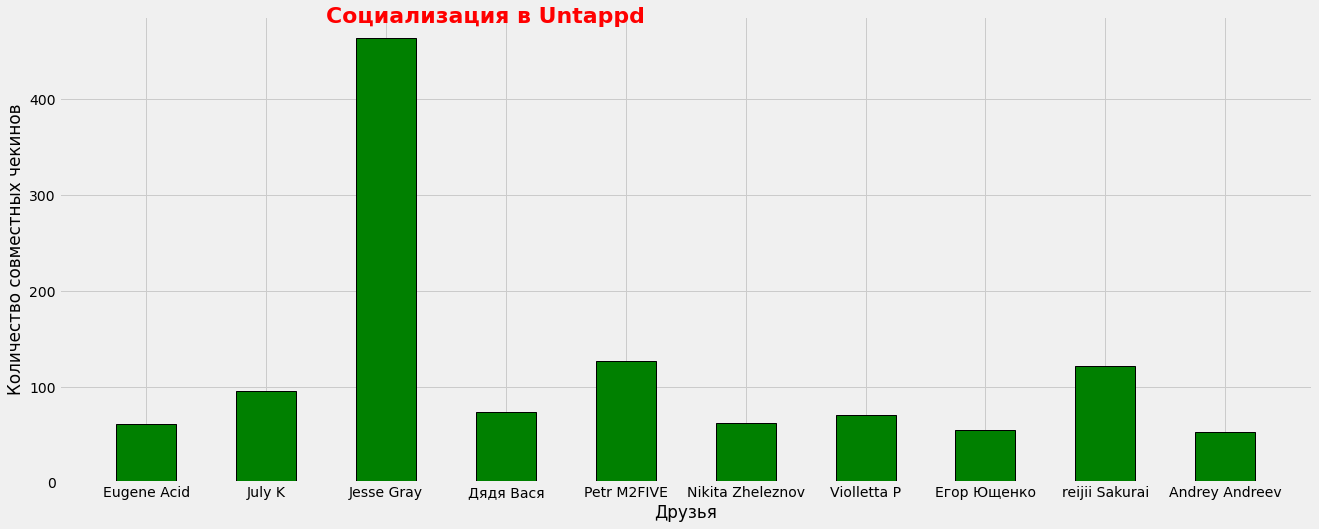

In [58]:
#строим график "социализации"

plt.figure(figsize=[20,8])
plt.bar(friends_count_50.keys(), friends_count_50.values(), width=0.5, color='green', edgecolor='black', linewidth=1)
style.use('fivethirtyeight')
plt.xlabel("Друзья")
plt.ylabel("Количество совместных чекинов")
plt.text(x = 1.5, y= 480, s="Социализация в Untappd", size = 22, weight='bold', color='red')
plt.show()

## 4.Заключение

Что можно вычленить из данного проекта?

Если рассматривать его серьёзно и для "потомков", то ничего.
Если смотреть на него "невооружённым глазом", то можно найти тренажёр, развлечение и попытку самоанализа. 

Можем ли мы оперировать имеющимися данными? Почему нет?

Например, увидеть куда движется крафтовая индустрия на примере большого количества "саур" и "смузи" сортов. Или же посмотреть, как ведёт себя человек увлечённый, как его втягивает в себя социальная сеть и очередной пример "маленького мира" в мире большом. 
И вообще, как и чем может быть инетересна такая наука, как статистика, и как красиво выглядят числа.

Особенно, когда их силуэт расплывается в отблеске пустого стекла.

Хотя по факту, не осушив бокал за успех, мы наткнёмся на очевидные проблемы выборок и репрезентативности.

## 5. Проверка статистических гипотез (в процессе)

В данном разделе проводится постепенная проверка собственных знаний и испытание действий по проверке статистических гипотез. На данный момент проведены: 

- ти-тест, в котором проверена гипотеза об однородности выставления оценок российским и американским сортам;
- anova, в котором рассмотрено влияние производителя на выставление оценки сорту пива.

Однако данные результаты являются лишь мгновенным применением имеющихся формул. В дальнейшем будет необходимо попробовать такие процессы, как проверка на нормальность, изменение объёма выборок, поправки Бонфирони и Тьюки, непараметрику для т-распределений.

In [59]:
#импорт

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal

### Критерий Стьюдента

Различаются ли между собой средние выборок генеральной совокупности всех оценок чекинов, если они сделаны для пива из разных (с некоторых точек зрения - "конкурирующих") стран.

H0 - средние значения для сортов из России и США не различаются;

alpha - уровень значимости - 0.05

In [60]:
#создаём выборки по 25 чекинов для российского и американского пива

data_usa = checkins_drop_notnan[checkins_drop_notnan['brewery_country'] == 'United States'].sample(30)
data_rus = checkins_drop_notnan[checkins_drop_notnan['brewery_country'] == 'Russia'].sample(30)
np.random.seed

<function RandomState.seed>

In [61]:
#проверяем значения, попавшие в выборки

data_usa['rating_score'].value_counts(dropna=False)

3.75    11
4.00     5
3.50     3
3.70     2
3.90     2
4.10     2
3.80     2
3.30     1
4.50     1
3.20     1
Name: rating_score, dtype: int64

In [62]:
data_rus['rating_score'].value_counts(dropna=False)

4.00    6
3.50    5
3.75    5
3.90    2
3.60    2
3.80    2
3.10    2
3.70    1
2.25    1
2.80    1
3.00    1
3.25    1
3.40    1
Name: rating_score, dtype: int64

In [63]:
#используем scipy.stats для вывода значения статистики и уровня значимости

stat, p = ttest_ind(data_usa['rating_score'], data_rus['rating_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2.396, p=0.020


In [64]:
#решаем, принять или отклонить нулевую гипотезу

alpha = 0.05
if p > alpha:
	print('Распределения одинаковы (мы не можем отклонить H0)')
else:
	print('Распределения различаются (отклоняем H0)')

Распределения различаются (отклоняем H0)


Для последующего анализа необходимо провести проверку на нормальность распределений.

### Дисперсионный анализ 

Очередь для дисперсионного анализа. Для него сделаем выборки из чекинов, отсортированных по пивоварням. В анализе будут участовать пять наиболее известных российских крафтовых пивоварен. 

Задание: Используя анализ однофакторной модели, проверим гипотезу о влиянии производителя на оценку качества продукции.

Н0 - средние каждой выборки не отличаются

alpha - уровень значимости - 0.05

In [65]:
#создаём выборки оценок для различных пивоварен (по 30 чекинов) 
np.random.seed
data_af = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'AF Brew'].sample(25)
data_stamm = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'Stamm Brewing'].sample(25)
data_zagovor = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'Zagovor Brewery'].sample(25)
data_village = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'Big Village Brewery'].sample(25)
data_dieta = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'DIETA / ДИЕТА'].sample(25)


In [66]:
#считаем статистику и p_value

stats, p2 = f_oneway(data_af['global_weighted_rating_score'], data_stamm['global_weighted_rating_score'], data_zagovor['global_weighted_rating_score'], data_village['global_weighted_rating_score'], data_dieta['global_weighted_rating_score'])
print('Statistics=%.3f, p=%.3f' % (stats, p2))

Statistics=8.094, p=0.000


In [67]:
#решаем, принять или отклонить нулевую гипотезу

alpha = 0.05
if p2 > alpha:
	print('Распределения одинаковы (мы не можем отклонить H0)')
else:
	print('Распределения различаются (отклоняем H0)')

Распределения различаются (отклоняем H0)


Проверяем те же выборки при помощи непараметрического подхода - Критерия Краскелла-Уоллеса

In [68]:
stat, p = kruskal(data_af['global_weighted_rating_score'], data_stamm['global_weighted_rating_score'], data_zagovor['global_weighted_rating_score'], data_village['global_weighted_rating_score'], data_dieta['global_weighted_rating_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=29.075, p=0.000


In [69]:
#решаем, принять или отклонить нулевую гипотезу

alpha = 0.05
if p > alpha:
	print('Распределения одинаковы (мы не можем отклонить H0)')
else:
	print('Распределения различаются (отклоняем H0)')

Распределения различаются (отклоняем H0)


Результаты однофакторного ANOVA и критерия Краскелла-Уоллеса совпадают.

Однако достоверность эксперимента следует проверить на разных количествах оценок, попадающих в выборку, а также на различных выборках. Также следует использовать такие инструменты, как поправка Бонфирони или критерий Тьюки.

### Корреляция и линейная регрессия

In [70]:
#проверяем наличие корреляции между двумя величинами - собственной оценкой сортов и оценкой сообщества

checkins_drop_notnan['rating_score'].corr(checkins_drop_notnan['global_weighted_rating_score'])

0.6135990767042444

#      Продолжение следует...